<a href="https://colab.research.google.com/github/dtnam302/CV/blob/main/Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import necessary libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob

import numpy as np
import scipy as sp
import pandas as pd
import tensorflow as tf

#OpenCV-Python
import cv2

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# skimage
from skimage.io import imshow, imread

# set additional display options for report
pd.set_option("display.max_columns", 100)
th_props = [('font-size', '13px'), ('background-color', 'white'), 
            ('color', '#666666')]
td_props = [('font-size', '15px'), ('background-color', 'white')]
styles = [dict(selector="td", props=td_props), dict(selector="th", 
            props=th_props)]

## **Download data**

In [ ]:
!gdown --id 1SomB0YZCXVql_bcaKpJQ3hdfaBVnqH1i

Downloading...
From: https://drive.google.com/uc?id=1SomB0YZCXVql_bcaKpJQ3hdfaBVnqH1i
To: /content/kaggle.json
100% 64.0/64.0 [00:00<00:00, 122kB/s]


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 4.7 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=867f0bcecb2039f1cc570c773778bb9b0db0c0bf2bacab9b2a5eece93f12218f
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small

 98% 556M/565M [00:14<00:00, 62.9MB/s]
100% 565M/565M [00:14<00:00, 41.5MB/s]


In [ ]:
!unzip /content/fashion-product-images-small.zip

Streaming output truncated to the last 5000 lines.
  inflating: myntradataset/images/58131.jpg  
  inflating: myntradataset/images/58132.jpg  
  inflating: myntradataset/images/58133.jpg  
  inflating: myntradataset/images/58135.jpg  
  inflating: myntradataset/images/58136.jpg  
  inflating: myntradataset/images/58137.jpg  
  inflating: myntradataset/images/58138.jpg  
  inflating: myntradataset/images/58139.jpg  
  inflating: myntradataset/images/5814.jpg  
  inflating: myntradataset/images/58140.jpg  
  inflating: myntradataset/images/58141.jpg  
  inflating: myntradataset/images/58143.jpg  
  inflating: myntradataset/images/58144.jpg  
  inflating: myntradataset/images/58145.jpg  
  inflating: myntradataset/images/58146.jpg  
  inflating: myntradataset/images/58147.jpg  
  inflating: myntradataset/images/58148.jpg  
  inflating: myntradataset/images/58149.jpg  
  inflating: myntradataset/images/5815.jpg  
  inflating: myntradataset/images/58150.jpg  
  inflating: myntradataset/imag

## **EDA**

In [ ]:
IMAGE_PATH = "/content/images"
TRAIN_PATH = "/content/styles.csv"

In [ ]:
train_data = pd.read_csv(TRAIN_PATH,usecols=range(10))

In [ ]:
len(train_data)

44446

In [ ]:
train_data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
train_data['path'] = train_data['id'].astype(str) + '.jpg'

In [ ]:
def load_image(file_path):
    path = os.path.join(IMAGE_PATH, file_path)
    image = imread(path)
    return image

In [ ]:
sample_images = train_data["path"][:1].apply(load_image)

In [ ]:
sample_images[0].shape

(80, 60, 3)

**Visualize some images in the training set**

In [ ]:
def plot_leafs(df, label):
  images = df[df['articleType'] == label]["path"][:100].apply(load_image)
  cols, rows = 3, min([3, len(images)//3])
  fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(30, rows*20/3))
  for col in range(cols):
      for row in range(rows):
          ax[row, col].imshow(images.loc[images.index[row*3+col]])

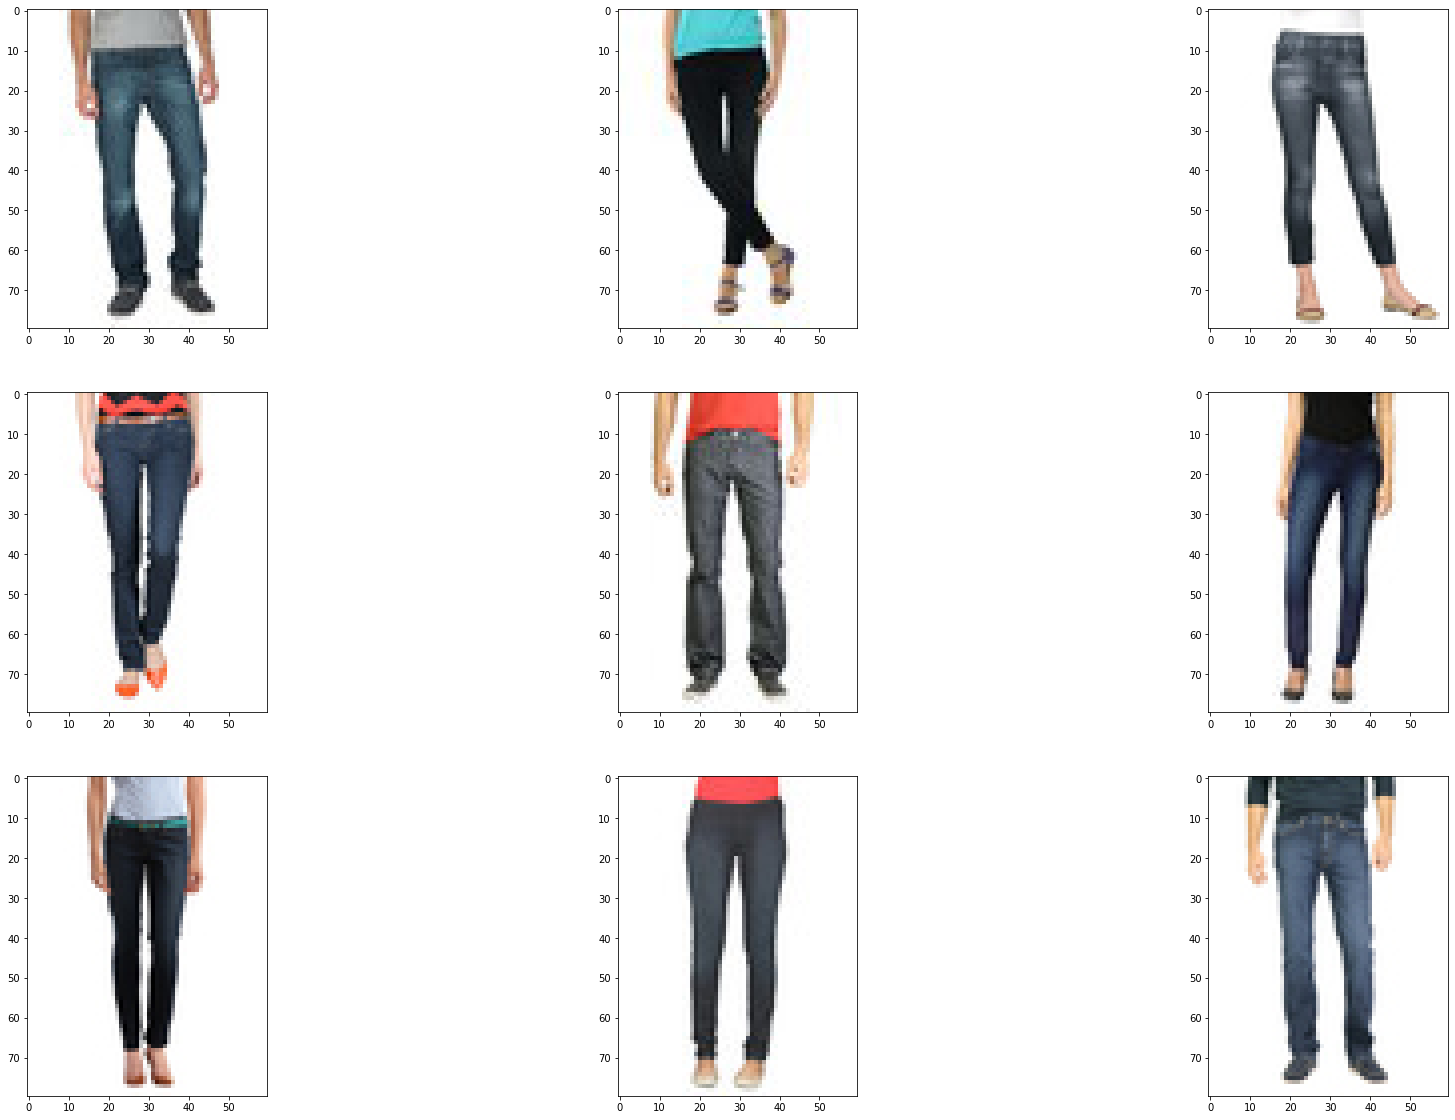

In [ ]:
plot_leafs(train_data, "Jeans")

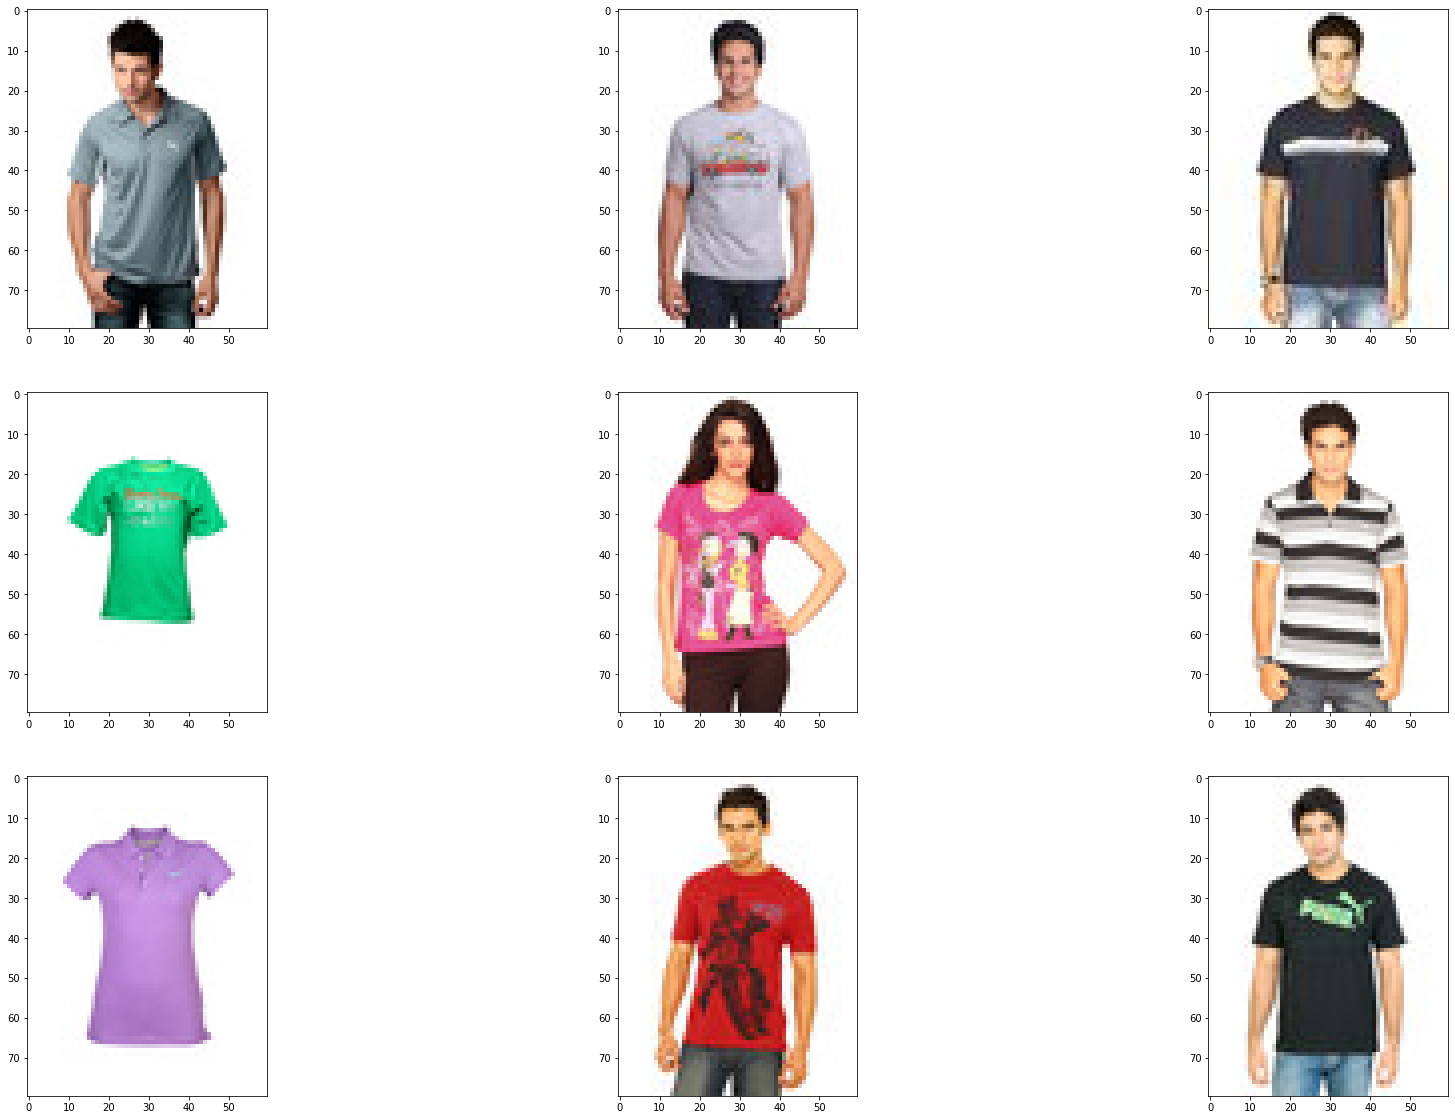

In [ ]:
plot_leafs(train_data, "Tshirts")

**Split dataset**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,path
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg


In [109]:
train_df, test_df = train_test_split(train_data, test_size=0.19, random_state=2021)

In [110]:
len(train_df),len(test_df)

(36001, 8445)

In [ ]:
def blur_preprocessing(img):
    return cv2.blur(img, (5, 5))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    validation_split=0.25,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,   
    preprocessing_function=blur_preprocessing,
    fill_mode='nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory="/content/images/",
    x_col="path",
    y_col="articleType",
    target_size=(256, 256),
    batch_size=16,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=2021
)

Found 24998 validated image filenames belonging to 140 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 4 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Visualize augmented image

In [ ]:
val_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory="/content/images/",
    x_col="path",
    y_col="articleType",
    color_mode="rgb",
    target_size=(256, 256),
    batch_size=16,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=2021
)

Found 8332 validated image filenames belonging to 140 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 4 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255.,
)

In [ ]:
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory="/content/images/",
    x_col="path",
    y_col="articleType",
    color_mode="rgb",
    target_size=(256, 256),
    batch_size=1,
    class_mode='categorical',
    shuffle = False,
    pickle_safe = True,
    workers = 1
)

Found 8332 validated image filenames belonging to 140 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 4 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


## **Modeling**

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
def plot_loss_accuracy(history):
    plt.style.use('fivethirtyeight')
    fig, axs = plt.subplots(1,2, figsize=(12, 5))

    hist = history.history

    for ax, metric in zip(axs, ["loss", "categorical_accuracy"]):
        ax.plot(hist[metric])
        ax.plot(hist["val_"+metric])
        ax.legend([metric, "val_" + metric])
        ax.set_title(metric)
    plt.style.use('default')

Model checkpoint

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/ColabNotebooks/DenseNet201", 
                                                monitor='val_loss', 
                                                verbose=1, 
                                                save_best_only=True,
                                                save_weights_only=True)

In [ ]:
EarlyStopping = tf.keras.callbacks.EarlyStopping( patience=5,
                                          min_delta=0.005,
                                          restore_best_weights=True)

Build model

In [ ]:
dense_net = tf.keras.applications.DenseNet201(input_shape=(256, 256, 3), weights="imagenet", include_top=False)

74850304/74836368 [==============================] - 3s 0us/step


In [ ]:
dense_net.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 128, 128, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [ ]:
def getModel(mode = None, ros = False, n = None):
  dense_net = tf.keras.applications.DenseNet201(input_shape=(256, 256, 3), weights="imagenet", include_top=False)
  if mode == 'FC_only':
    dense_net.trainable = False
  elif mode == 'n_last_layers':
    # dense_net.trainable = False
    if n is None: n = len(dense_net.layers)//10
    for layer in dense_net.layers[:-n]:
      layer.trainable = False
    for layer in dense_net.layers[-n:]:
      layer.trainable = True
  else:
    mode = "All"
    dense_net.trainable = True
  model = tf.keras.models.Sequential([  dense_net,
                                        tf.keras.layers.GlobalAveragePooling2D(),
                                        tf.keras.layers.Dense(256, activation='relu'),
                                        tf.keras.layers.Dropout(0.3),
                                        tf.keras.layers.Dense(140, activation='softmax')
                                ])
  checkpoint = getCheckPoint(mode, ros)
  return model, checkpoint

def getCheckPoint(mode=None, ros=False):
  checkpoint_path = "/content/drive/MyDrive/Master/CV/DenseNet201/" + mode 
  if ros: checkpoint_path = checkpoint_path + '_ros'
  checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                monitor='val_loss', 
                                                verbose=1, 
                                                save_best_only=True,
                                                save_weights_only=True)
  return checkpoint

Train FC only

In [ ]:
 model, checkpoint = getModel('FC_only')
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 8, 8, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               491776    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 140)               35980     
                                                                 
Total params: 18,849,740
Trainable params: 527,756
Non-trainable params: 18,321,984
______________________________________

In [ ]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['categorical_accuracy'])

In [ ]:

# history = model.fit_generator(train_generator, 
#                               validation_data=val_generator, 
#                               epochs=10, 
#                               steps_per_epoch = train_generator.n//train_generator.batch_size, 
#                               validation_steps = val_generator.n // val_generator.batch_size,
#                               callbacks=[checkpoint, EarlyStopping])

## **Evaluating Phase**

###Define plot function

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [ ]:
def plot_loss_accuracy(history):
    plt.style.use('fivethirtyeight')
    fig, axs = plt.subplots(1,2, figsize=(12, 5))

    hist = history

    for ax, metric in zip(axs, ["loss", "categorical_accuracy"]):
        ax.plot(hist[metric])
        ax.plot(hist["val_"+metric])
        ax.legend([metric, "val_" + metric])
        ax.set_title(metric)
    plt.style.use('default')

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:


"""
Ref : http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
"""
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def get_cf(y_test,y_pred_raw):
  #y_pred_raw = (y_pred_raw > 0.5) 
  y_pred_cf=np.argmax(y_pred_raw, axis=1)
  y_test_cf=np.argmax(y_test, axis=1)
  cf_matrix = confusion_matrix(y_test_cf, y_pred_cf)
  return cf_matrix

In [ ]:
def plot_infer(n_samples,X_test,y_test,y_pred_raw,get_true=True):
  y_conf = np.amax(y_pred_raw,axis=1)
  y_pred = np.argmax(y_pred_raw,axis=1)
  y_pred_gt = np.argmax(y_test,axis=1)
  if get_true:
    predictions = X_test[y_pred == y_pred_gt]
    predictions_cf = y_conf[y_pred == y_pred_gt]
    predictions_gt = y_pred_gt[y_pred == y_pred_gt]
    predictions_pred = y_pred[y_pred == y_pred_gt]
  else:
    predictions = X_test[y_pred != y_pred_gt]
    predictions_cf = y_conf[y_pred != y_pred_gt]
    predictions_gt = y_pred_gt[y_pred != y_pred_gt]
    predictions_pred = y_pred[y_pred != y_pred_gt]
  
  test_gs = gridspec.GridSpec(n_samples, 5)

  # plot samples for each traffic signs 
  data_set_fig = plt.figure(figsize=(15, 20))
  # st = data_set_fig.suptitle("Training  DataSet Samples", fontsize="x-large")
  ax = []
  for img_id in range(n_samples):
      # plot Input Image and label
      ax.append(data_set_fig.add_subplot(test_gs[img_id, 0]))
      ax[-1].imshow(predictions[img_id].squeeze())
      ax[-1].set_axis_off()
      if img_id == 0:
          plt.title('Input Image')

      ax.append(data_set_fig.add_subplot(test_gs[img_id, 1]))
      ax[-1].text(0, 0.6, g_labels[predictions_gt[img_id]], ha='left', va='top', wrap=True)
      ax[-1].set_axis_off()
      if img_id == 0:
          plt.title('Input Label')

      #plot predected sign image and accuarcy 
      ax.append(data_set_fig.add_subplot(test_gs[img_id, 2]))
      ax[-1].text(0, 0.6, g_labels[predictions_pred[img_id]], ha='left', va='top', wrap=True)
      ax[-1].set_axis_off()
      if img_id == 0:
          plt.title('Output Prediction')

      ax.append(data_set_fig.add_subplot(test_gs[img_id, 3]))
      ax[-1].imshow(load_image(g_imgs[predictions_pred[img_id]]))
      ax[-1].set_axis_off()
      if img_id == 0:
          plt.title('Ground truth output')

      ax.append(data_set_fig.add_subplot(test_gs[img_id, 4]))
      ax[-1].text(0, 0.6, predictions_cf[img_id], ha='left', va='top', wrap=True)
      ax[-1].set_axis_off()
      if img_id == 0:
          plt.title('Prediction Probability')
  



###Choose model

In [ ]:
model.load_weights('/content/drive/MyDrive/Master/CV/DenseNet201/FC_only')

###Evaluating

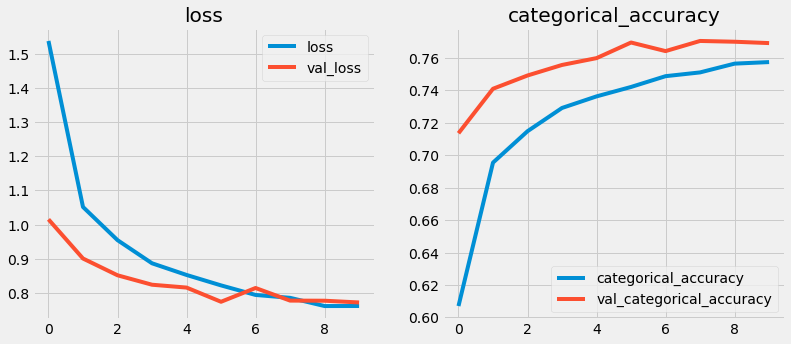

In [ ]:
plot_loss_accuracy(history)

In [ ]:
test_generator.reset()
scores = model.evaluate(test_generator, steps=test_generator.n // test_generator.batch_size)

8332/8332 [==============================] - 580s 65ms/step - loss: 0.9345 - categorical_accuracy: 0.7327


In [ ]:
print("Loss: {:6.2f}, Accuracy: {:6.2f}%".format(scores[0],scores[1]*100))

Loss:   0.93, Accuracy:  73.27%


In [ ]:
test_generator.reset()
y_pred_raw = model.predict_generator(test_generator, steps=test_generator.n // test_generator.batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [ ]:
import pickle

In [ ]:
print(y_pred_raw.shape)
print(y_pred_raw)

(8332, 140)
[[1.3763853e-09 4.5967188e-11 1.0189970e-03 ... 7.2090489e-07
  9.4559820e-13 3.2622092e-16]
 [4.3305515e-16 1.8011652e-14 2.0934793e-08 ... 1.7837602e-10
  2.9885721e-16 4.6596582e-21]
 [6.9476591e-13 7.7558923e-17 1.6789631e-08 ... 1.0778415e-07
  7.2503703e-14 2.5528201e-14]
 ...
 [3.1169013e-13 3.0630683e-14 2.1700307e-08 ... 1.0719563e-09
  8.9248437e-18 1.4126048e-19]
 [2.0610798e-07 3.5456457e-14 8.8474061e-10 ... 1.8977394e-06
  3.0513113e-15 2.6980125e-18]
 [1.5675750e-09 7.0337045e-18 1.0491837e-08 ... 3.2131990e-09
  9.3130951e-15 6.0062742e-17]]


In [ ]:
y_test_raw = tf.keras.utils.to_categorical(test_generator.labels, 140)

In [ ]:
y_test_raw.shape

(8332, 140)

In [ ]:
test = test_generator.filenames
len(test)

8332

In [ ]:
data = (scores,y_pred_raw,y_test_raw,test)
file_to_store = open("/content/drive/MyDrive/Master/CV/data_raw.p", "wb")
pickle.dump(data, file_to_store)
file_to_store.close()

In [ ]:
(scores,y_pred_raw,y_test_raw,X_test_path) = pd.read_pickle(r"/content/drive/MyDrive/Master/CV/data_raw.p")

In [ ]:
y_pred = np.argmax(y_pred_raw,axis=1)
y_test = np.argmax(y_test_raw,axis=1)
y_conf = np.amax(y_pred_raw,axis=1)

In [ ]:
y_conf

array([0.5080362 , 0.999448  , 0.88456595, ..., 0.58910966, 0.98948646,
       0.58862644], dtype=float32)

In [ ]:
my_dict = test_generator.class_indices

In [ ]:
print(list(my_dict.keys())[list(my_dict.values()).index(0)])

Accessory Gift Set


In [ ]:
y_pred_str = list(map(lambda x:list(my_dict.keys())[list(my_dict.values()).index(x)],y_pred ))
y_test_str = list(map(lambda x:list(my_dict.keys())[list(my_dict.values()).index(x)],y_test ))

In [ ]:
df = pd.DataFrame()

In [ ]:
df['pred'] = y_pred_str
df['test'] = y_test_str
df['conf'] = y_conf
df['path'] = X_test_path

In [ ]:
df.head()

,pred,test,conf,path
0,Tshirts,Tshirts,0.508036,19795.jpg
1,Tshirts,Tshirts,0.999448,19554.jpg
2,Trousers,Trousers,0.884566,11268.jpg
3,Kurtas,Kurtas,0.374561,30723.jpg
4,Compact,Compact,0.567100,56608.jpg


In [ ]:
df.to_csv("/content/drive/MyDrive/Master/CV/data.csv",float_format='%.5f')

In [ ]:
confusion_matrix = confusion_matrix(y_test_str,y_pred_str,labels=list(test_generator.class_indices.keys()))

In [ ]:
data = (confusion_matrix,list(test_generator.class_indices.keys()))
file_to_store = open("/content/drive/MyDrive/Master/CV/cfmt_keys.p", "wb")
pickle.dump(data, file_to_store)
file_to_store.close()

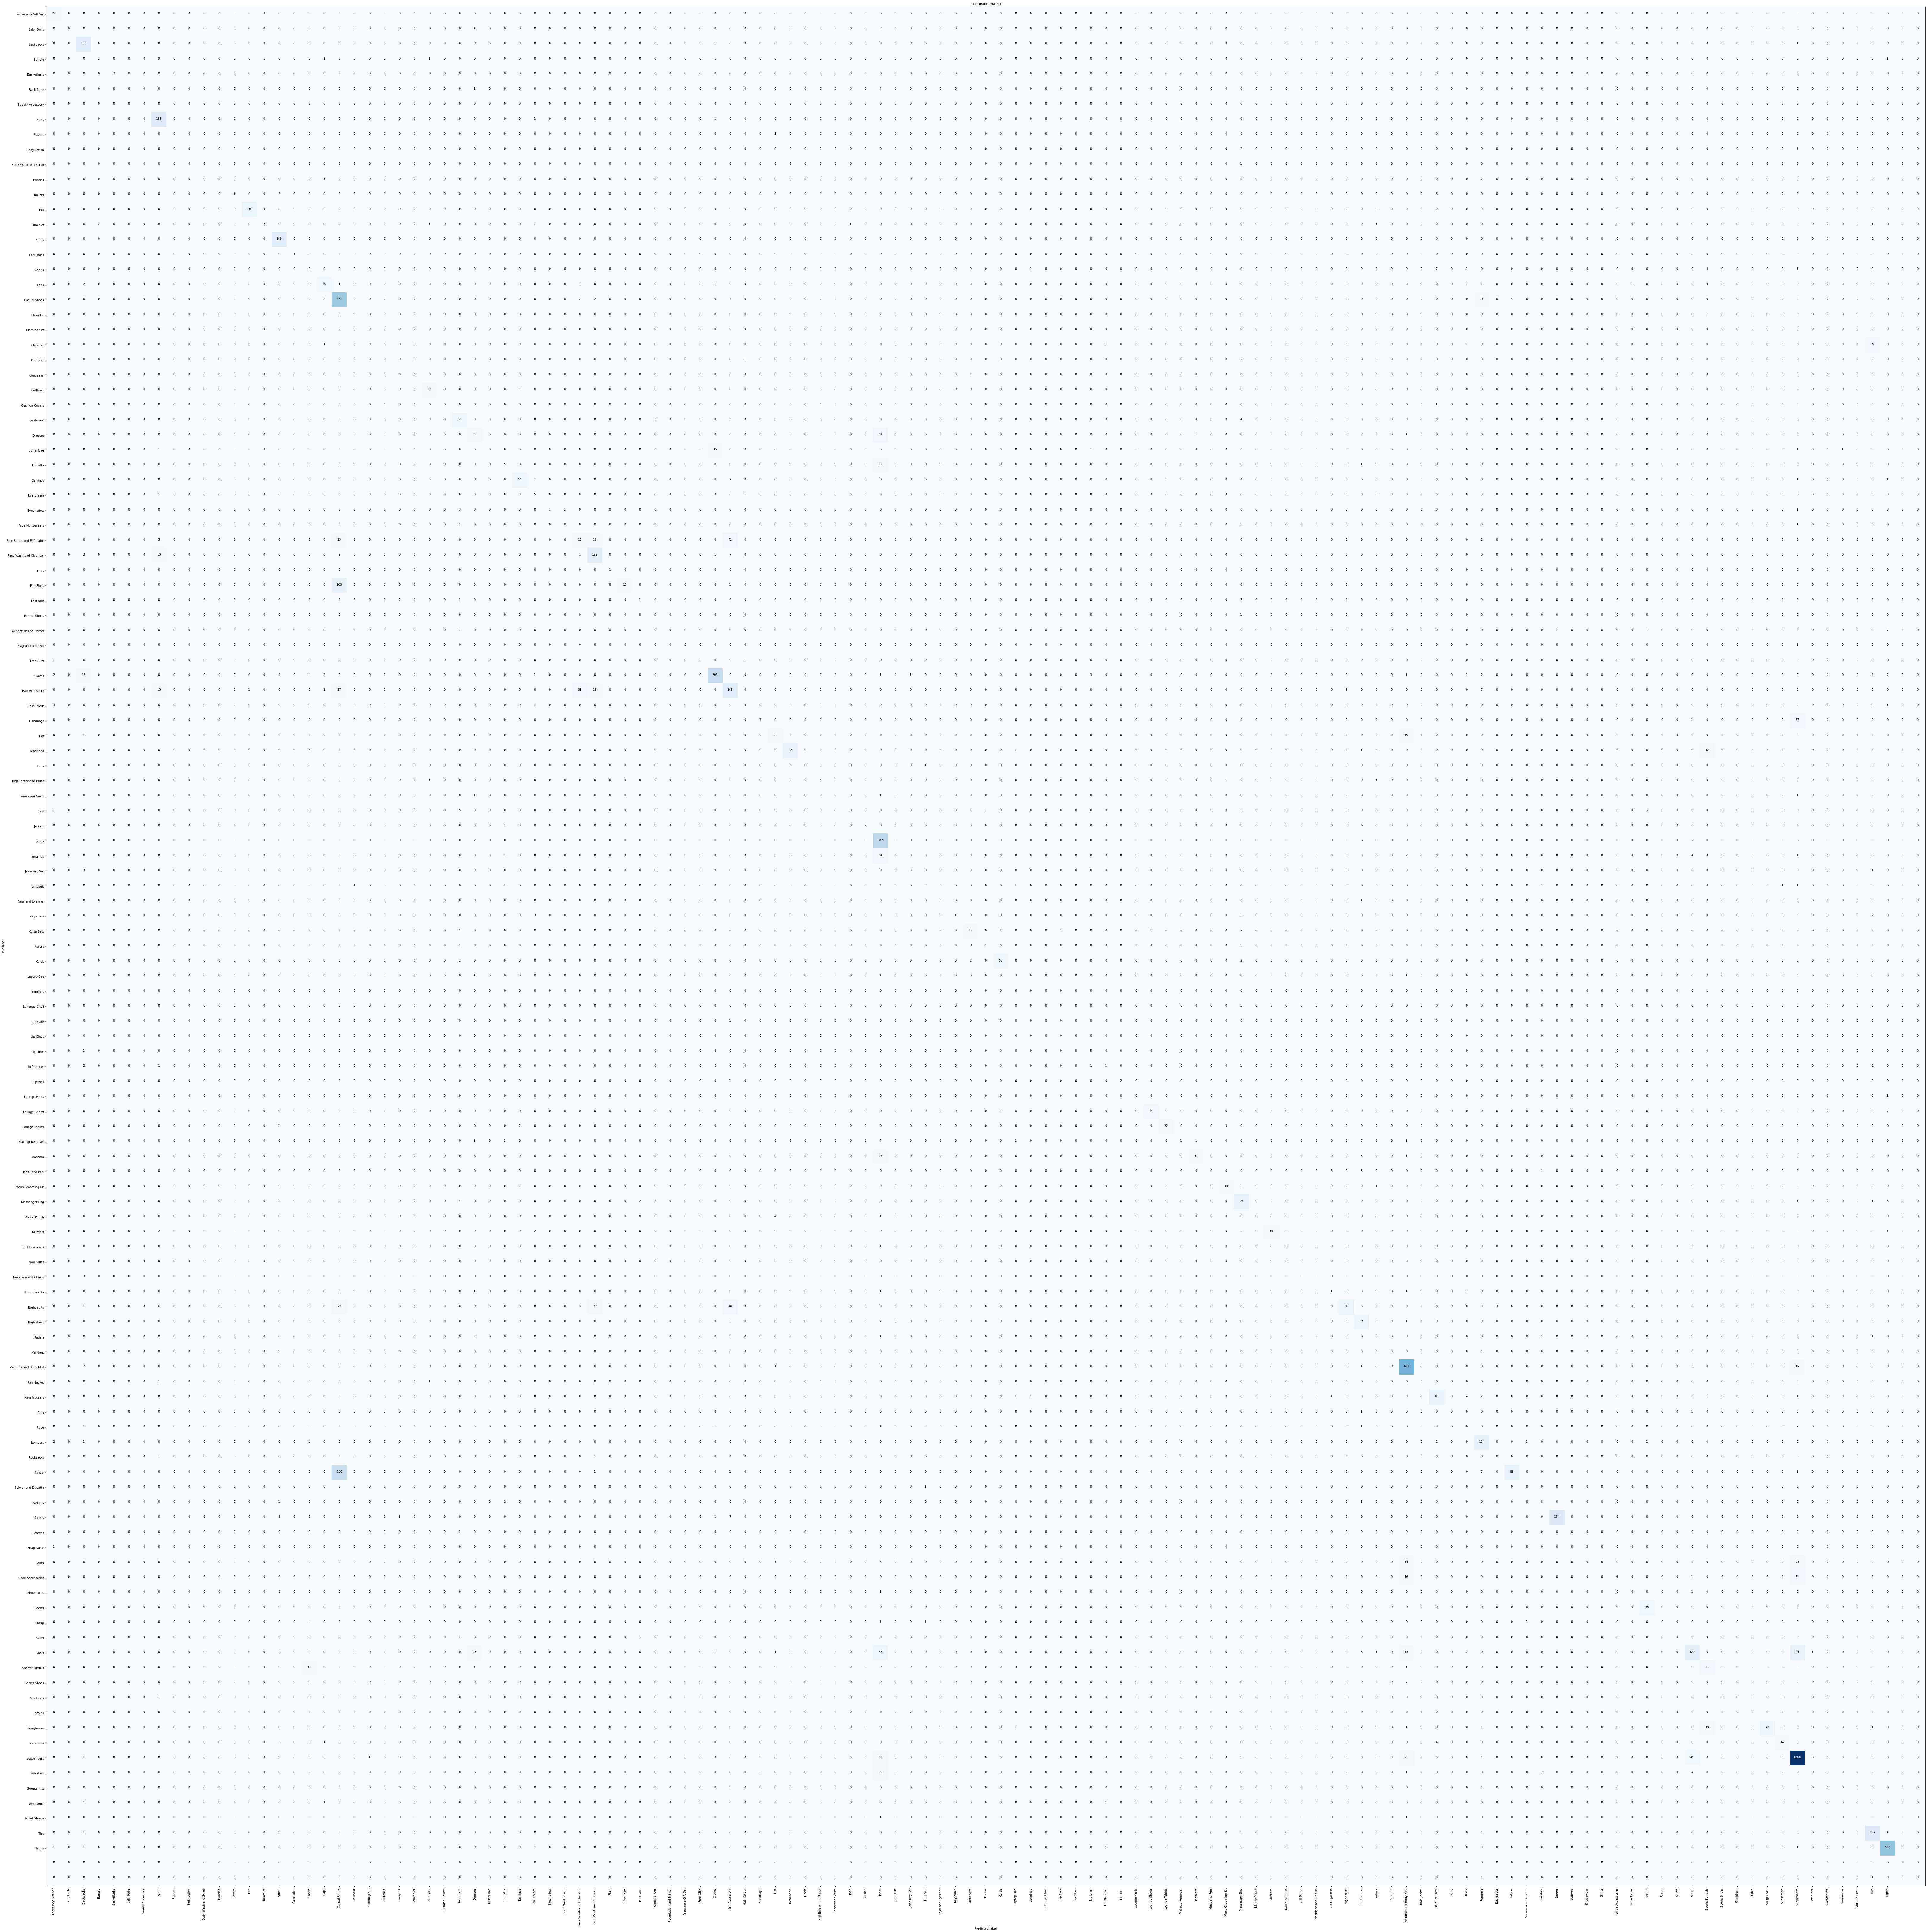

In [ ]:
plt.figure(figsize=(90,90))
plot_confusion_matrix(get_cf(y_test,y_pred_raw), classes=list(g_labels.keys())[:123], title=' confusion matrix')

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

clrp = classification_report(y_test_str, y_pred_str)
print(clrp)
file_to_store = open("/content/drive/MyDrive/Master/CV/clrp.p", "wb")
pickle.dump(clrp, file_to_store)
file_to_store.close()

                        precision    recall  f1-score   support

    Accessory Gift Set       0.67      1.00      0.80        22
            Baby Dolls       0.00      0.00      0.00         3
             Backpacks       0.79      0.99      0.88       152
                Bangle       0.50      0.12      0.19        17
           Basketballs       1.00      1.00      1.00         2
             Bath Robe       0.00      0.00      0.00         5
      Beauty Accessory       0.00      0.00      0.00         2
                 Belts       0.75      0.99      0.85       160
               Blazers       0.00      0.00      0.00         4
           Body Lotion       0.00      0.00      0.00         3
   Body Wash and Scrub       0.00      0.00      0.00         1
               Booties       0.00      0.00      0.00         3
                Boxers       1.00      0.31      0.47        13
                   Bra       0.96      0.91      0.94        88
              Bracelet       0.75      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
